In [44]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

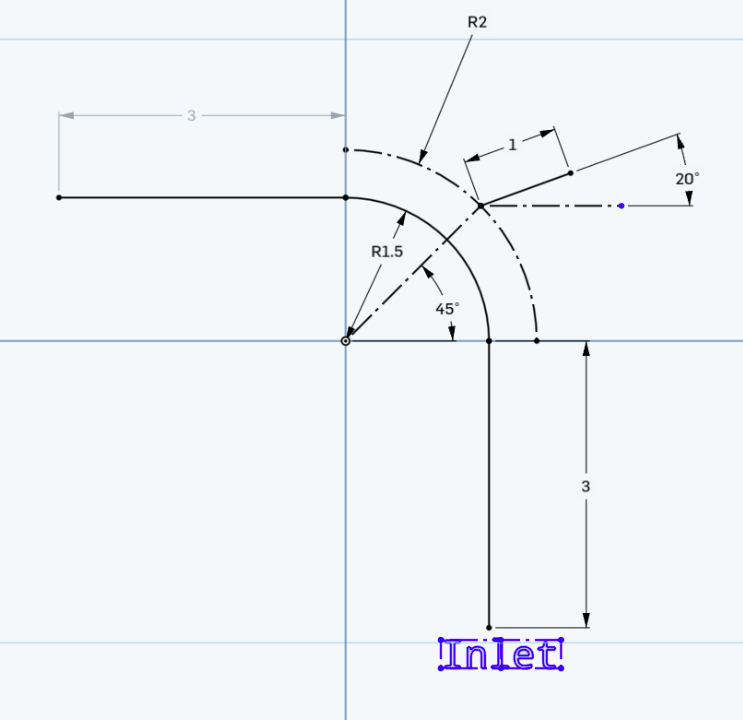

In [45]:
display.Image("../mixing-elbow.png")

In [36]:
def find_intersection_with_tubes(m, c, xA, yA, r, tl):
    # look for intersection with vertical tube
    yV = r*m + c
    # look for intersection with horizontal tube
    xH = (r-c)/m
    
    if yV < 0:
        print("intersection with vertical")
        if -yV <= tl:
            L = np.sqrt((r-xA)**2 + (yV-yA)**2)
            color = [0,0,1]
        else:
            print("intersection with tube too far away")
            L = -1
            color = [0.75,0,0]
    elif xH < 0:
        print("intersection with horizontal")
        if -xH <= tl:
            L = np.sqrt((xH-xA)**2 + (1.5-yA)**2)
            color = [0,1,0]
        else:
            print("intersection with tube too far away")
            L = -1
            color = [1,0,0]
    else:
        print("no intersection?!?")
        L = -1
        color = [0.2,0.2,0.2]
    return L, color

In [37]:
def find_intersection_with_elbow(insert_angle, xA, yA, r, tl):
    # check if injection tube axis is vertical
    if insert_angle < np.pi/2:
        # if not vertical we compute the intersection between the line of the 
        # injection tube and the circle of the elbow 
        # system x^2+y^2 = r_tube^2 and (y-yB)/(x-xB) = m
        m = np.tan(insert_angle)
        c = yA-m*xA
        A = m**2+1
        Bhalf = m*c
        C = (c**2 - r**2)
        Delta = r**2*(m**2+1)-c**2
        if Delta < 0:
            # no intersection 
            # we look for intersection
            print("NO INTERSECTION with ELBOW")
            
            if m == 0:
                print("horizontal line not intersecting circle.. unfeasible")
                L = -1
                color = [0.25,0,0]
            else:
                L,color = find_intersection_with_tubes(m, c, xA, yA, r, tl)
        else:
            # intersection coordinates
            xC = (-Bhalf + np.sqrt(Delta))/A
            yC = m*xC+c
            print("xC = {0}, yC = {1}".format(xC,yC))
            if xC >= 0 and yC >= 0:
                # intersection in the first quadrant
                L =np.sqrt((xC-xA)**2 + (yC-yA)**2)
                color = [0,1,1]
            else:
                # intersection in other quadrants: we look for intersection with tubes
                print("INTERSECTION IN OTHER QUADRANTS")
                L, color = find_intersection_with_tubes(m, c, xA, yA, r, tl)
    else:
        print("vertical")
        if xA > r:
            print("xA = {0}, r ={1} NO INTERSECTION with ELBOW... Unfeasible".format(xA,r))
            L = -1
            color = [0.5,0,0]
        else:
            # find intersection with circle
            yI = np.sqrt(r**2-xA**2)
            L = yA - yI
            color = [0,1,1]

    return L,color

In [38]:
# main tube radius
tube_r = 0.5
# lenght of tube before, after
tube_l = 3
# radius of elbow
elbow_r = 1.5
# injection tube length
injection_l = 1

In [39]:
n = 200

#angle between x-axis and line connecting origin and insertion point (45° in the picture above)
junct_α = np.linspace(0,np.pi/2,n)
#angle between x-axis and injection pipe axis (20° in the picture above)
insert_α = np.linspace(0,np.pi/2,n)

data_c = np.zeros((n,n,3))
data_l = np.zeros((n,n))

In [40]:


for ii, junction_angle in enumerate(junct_α):
    # point A: intestection point
    pA = (elbow_r+tube_r)*np.array([np.cos(junction_angle),np.sin(junction_angle),0])
    
    for jj, insert_angle in enumerate(insert_α):
        data_l[ii,jj] , data_c[ii,jj,:] = find_intersection_with_elbow(insert_angle, pA[0], pA[1], elbow_r, tube_l)


xC = 1.5, yC = 0.0
xC = 1.499994807456218, yC = -0.003946847398064649
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4999792258336884, yC = -0.007894432681899821
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.499953243151398, yC = -0.011843494399998183
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4999168394160909, yC = -0.015794772427764475
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4998699865848202, yC = -0.0197490086346473
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.499812648512337, yC = -0.02370694755569916
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4997447808831201, yC = -0.027669337069070127
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4996663311278033, yC = -0.03163692908096569
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4995772383236974, yC = -0.035610480219631174
INTERSECTION IN OTHER QUADRANTS
intersection wit

INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4997935649550869, yC = -0.02488498582101062
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4997193599824927, yC = -0.02901450143812534
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4996333831524256, yC = -0.03316196819869022
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4995354603420035, yC = -0.03732831602008718
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.499425405546436, yC = -0.041514493877499614
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4993030204369797, yC = -0.04572147097972529
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4991680938853476, yC = -0.04995023799916365
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4990204014523898, yC = -0.054201808360200665
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.498859704838635, yC = -0.058477219590540364
INTERSECT

INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4889451436572618, yC = -0.18177557366009256
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.488155128209093, yC = -0.18813376726408704
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4873230123664694, yC = -0.19460281828671144
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4864465827168887, yC = -0.20118786426940205
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4855234530475514, yC = -0.20789437329009042
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4845510469712346, yC = -0.21472817452912696
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4835265783254663, yC = -0.2216954925160488
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4824470289942968, yC = -0.22880298561422285
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4813091237355702, yC = -0.23605778940284283
INTERSECTION

NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too f

NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
i

intersection with vertical
xC = 1.4758853965309022, yC = -0.2678848564342924
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4733427833553854, yC = -0.2815333776563731
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4705330019519551, yC = -0.29585924046777823
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4674175258126334, yC = -0.3109434111505327
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4639491784517265, yC = -0.3268834699254697
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4600693075341145, yC = -0.3437988033673931
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.455703676552843, yC = -0.361838093724991
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4507562900302389, yC = -0.38119048642076203
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
xC = 1.4450997334984488, yC = -0.4021029224498527
INTERSECTION IN OTHER QUADRANTS
intersection with v

intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
N

intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with vertical
intersection with tube too far away
N

intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
N

xC = 1.449134164928121, yC = -0.38731146644280656
INTERSECTION IN OTHER QUADRANTS
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW
intersection with vertical
NO INTERSECTION with ELBOW


xC = 1.2624669224383032, yC = 0.8100476959717613
xC = 1.265026028751086, yC = 0.8060453750144942
xC = 1.2675493765891126, yC = 0.8020714294304168
xC = 1.270038161005673, yC = 0.7981247205727487
xC = 1.2724935276353901, yC = 0.794204143861036
xC = 1.2749165754381475, yC = 0.7903086268497048
xC = 1.277308359258179, yC = 0.7864371274101816
xC = 1.2796698922131102, yC = 0.7825886320176689
xC = 1.2820021479263897, yC = 0.7787621541344466
xC = 1.2843060626153107, yC = 0.7749567326822562
xC = 1.2865825370457333, yC = 0.7711714305969617
xC = 1.288832438363624, yC = 0.7674053334592319
xC = 1.2910566018126501, yC = 0.7636575481955062
xC = 1.2932558323462588, yC = 0.7599272018439568
xC = 1.2954309061419558, yC = 0.7562134403805785
xC = 1.2975825720248475, yC = 0.7525154276009105
xC = 1.2997115528069096, yC = 0.7488323440532277
xC = 1.3018185465479317, yC = 0.7451633860193552
xC = 1.3039042277435837, yC = 0.7415077645395283
xC = 1.3059692484456238, yC = 0.7378647044779778
xC = 1.3080142393188583, 

intersection with vertical
intersection with tube too far away
vertical
xA = 1.7501740449571874, r =1.5 NO INTERSECTION with ELBOW... Unfeasible
xC = 1.1341225949235625, yC = 0.9817158141151874
xC = 1.1382338294082783, yC = 0.9769461344365747
xC = 1.142256799538666, yC = 0.9722393758265934
xC = 1.146195382444035, yC = 0.9675929646622967
xC = 1.1500532234063803, yC = 0.9630044565486676
xC = 1.1538337541172983, yC = 0.958471526890383
xC = 1.1575402091676095, yC = 0.9539919623142569
xC = 1.1611756409725282, yC = 0.9495636528490539
xC = 1.1647429333084023, yC = 0.9451845847812687
xC = 1.1682448136142378, yC = 0.9408528341156412
xC = 1.171683864191735, yC = 0.9365665605779037
xC = 1.1750625324208746, yC = 0.9323240021047624
xC = 1.1783831400937732, yC = 0.9281234697726045
xC = 1.1816478919571505, yC = 0.9239633431220214
xC = 1.1848588835430935, yC = 0.9198420658401166
xC = 1.1880181083585455, yC = 0.9157581417668003
xC = 1.1911274644959033, yC = 0.911710131194976
xC = 1.1941887607201214, yC

xC = 1.3303099973455828, yC = 0.6930189831183535
xC = 1.3323744397267452, yC = 0.6890416187450812
xC = 1.334442544860452, yC = 0.685027805615481
xC = 1.3365146520911293, yC = 0.6809761998379442
xC = 1.338591103382908, yC = 0.6768854097586456
xC = 1.3406722435457408, yC = 0.6727539932144808
xC = 1.342758420462936, yC = 0.6685804546020475
xC = 1.344849985320101, yC = 0.6643632417469552
xC = 1.3469472928354504, yC = 0.6601007425562033
xC = 1.349050701491376, yC = 0.6557912814345939
xC = 1.3511605737671155, yC = 0.6514331154441868
xC = 1.353277276372284, yC = 0.6470244301836001
xC = 1.3554011804809416, yC = 0.6425633353614801
xC = 1.3575326619657784, yC = 0.6380478600356772
xC = 1.3596721016318751, yC = 0.6334759474865335
xC = 1.361819885449355, yC = 0.6288454496891149
xC = 1.3639764047840979, yC = 0.6241541213452382
xC = 1.3661420566254623, yC = 0.6193996134315487
xC = 1.3683172438097755, yC = 0.6145794662147597
xC = 1.3705023752380499, yC = 0.6096911016792546
xC = 1.3726978660860887, yC 

xC = 1.2730970039633993, yC = 0.7932364203057092
xC = 1.2754273558444233, yC = 0.7894840466809336
xC = 1.2777630970539104, yC = 0.7856980767490773
xC = 1.2801046506738234, yC = 0.781877281498349
xC = 1.282452444987618, yC = 0.7780203894148796
xC = 1.2848069138749472, yC = 0.7741260840839388
xC = 1.2871684972187847, yC = 0.7701930016350029
xC = 1.2895376413259618, yC = 0.7662197280176721
xC = 1.2919147993621756, yC = 0.7622047960941922
xC = 1.2943004318025744, yC = 0.7581466825329177
xC = 1.2966950068991048, yC = 0.7540438044854763
xC = 1.2990990011658632, yC = 0.7498945160286588
xC = 1.301512899883788, yC = 0.7456971043500791
xC = 1.3039371976260903, yC = 0.7414497856544422
xC = 1.3063723988059353, yC = 0.7371507007647939
xC = 1.3088190182479644, yC = 0.7327979103903308
xC = 1.311277581785367, yC = 0.7283893900292062
xC = 1.3137486268843166, yC = 0.7239230244712296
xC = 1.316232703297711, yC = 0.7193966018613098
xC = 1.318730373750293, yC = 0.7148078072799793
xC = 1.321242214657359, yC

xC = 0.9900394825220789, yC = 1.126863710946188
xC = 0.9936369206934583, yC = 1.123692871666819
xC = 0.9971906958774479, yC = 1.1205403678830368
xC = 1.000702328629314, yC = 1.1174054096324526
xC = 1.004173279273483, yC = 1.1142872274208024
xC = 1.0076049512974425, yC = 1.1111850710484181
xC = 1.0109986945184555, yC = 1.1080982085004825
xC = 1.014355808041469, yC = 1.1050259248961263
xC = 1.0176775430248781, yC = 1.10196752149183
xC = 1.0209651052692912, yC = 1.0989223147349705
xC = 1.0242196576430553, yC = 1.0958896353636813
xC = 1.0274423223571016, yC = 1.0928688275495122
xC = 1.0306341831005388, yC = 1.089859248079625
xC = 1.0337962870474524, yC = 1.0868602655755253
xC = 1.0369296467444624, yC = 1.0838712597455495
xC = 1.0400352418877852, yC = 1.0808916206685184
xC = 1.0431140209978258, yC = 1.0779207481061615
xC = 1.0461669029986564, yC = 1.0749580508420782
xC = 1.0491947787091445, yC = 1.0720029460451446
xC = 1.0521985122519588, yC = 1.0690548586554218
xC = 1.055178942386176, yC =

xC = 0.852407774610198, yC = 1.2342613117910202
xC = 0.8568648994376217, yC = 1.231171208285734
xC = 0.861254322066326, yC = 1.2281046342726964
xC = 0.8655786204476913, yC = 1.2250606727113036
xC = 0.8698402494740516, yC = 1.2220384365456431
xC = 0.8740415490136112, yC = 1.2190370669499293
xC = 0.8781847513063722, yC = 1.2160557316887104
xC = 0.8822719877818465, yC = 1.213093623582067
xC = 0.8863052953526618, yC = 1.2101499590669875
xC = 0.8902866222323248, yC = 1.2072239768469468
xC = 0.8942178333202763, yC = 1.204314936622473
xC = 0.8981007151928664, yC = 1.2014221178961464
xC = 0.9019369807349041, yC = 1.1985448188460892
xC = 0.905728273442915, yC = 1.1956823552625155
xC = 0.9094761714281422, yC = 1.1928340595424025
xC = 0.9131821911445684, yC = 1.1899992797377672
xC = 0.9168477908647814, yC = 1.1871773786534048
xC = 0.9204743739243372, yC = 1.184367732990307
xC = 0.924063291753323, yC = 1.1815697325312684
xC = 0.9276158467120966, yC = 1.1787827793654777
xC = 0.9311332947466159, yC 

xC = 1.058309055883471, yC = 1.0630060875813632
xC = 1.0613195774985231, yC = 1.0600003558576552
xC = 1.064338682211155, yC = 1.0569688593090256
xC = 1.0673669756704522, yC = 1.0539106884589944
xC = 1.0704050730134627, yC = 1.0508249043808604
xC = 1.0734535995510839, yC = 1.0477105371288484
xC = 1.0765131914819919, yC = 1.0445665840745892
xC = 1.0795844966369468, yC = 1.041392008141579
xC = 1.082668175256015, yC = 1.0381857359296607
xC = 1.0857649008014172, yC = 1.0349466557208102
xC = 1.088875360808943, yC = 1.0316736153567145
xC = 1.0920002577810988, yC = 1.0283654199777494
xC = 1.0951403101254227, yC = 1.0250208296119605
xC = 1.0982962531416867, yC = 1.021638556601566
xC = 1.1014688400620336, yC = 1.0182172628532666
xC = 1.1046588431484419, yC = 1.0147555568972972
xC = 1.1078670548523237, yC = 1.0112519907386277
xC = 1.1110942890414832, yC = 1.0077050564820045
xC = 1.1143413823001729, yC = 1.0041131827106637
xC = 1.117609195308518, yC = 1.0004747305963537
xC = 1.120898614308199, yC 

xC = 0.57653746453582, yC = 1.3847759934323705
xC = 0.583309937687998, yC = 1.3819368714215652
xC = 0.5899263927176683, yC = 1.3791253935647474
xC = 0.5963946224006863, yC = 1.3763406026022567
xC = 0.6027218783567009, yC = 1.3735815728780618
xC = 0.6089149211875833, yC = 1.3708474089974856
xC = 0.6149800648755899, yC = 1.3681372445064184
xC = 0.6209232162215269, yC = 1.365450240600922
xC = 0.6267499099811038, yC = 1.3627855848733792
xC = 0.6324653402571181, yC = 1.360142490099272
xC = 0.6380743886218223, yC = 1.3575201930670822
xC = 0.6435816493746048, yC = 1.35491795345263
xC = 0.6489914522822272, yC = 1.352335052738265
xC = 0.6543078831003473, yC = 1.3497707931766572
xC = 0.659534802134159, yC = 1.3472244967984568
xC = 0.6646758610614246, yC = 1.3446955044627218
xC = 0.6697345182118201, yC = 1.3421831749487778
xC = 0.6747140524715615, yC = 1.3396868840879956
xC = 0.6796175759609056, yC = 1.3372060239338674
xC = 0.6844480456138395, yC = 1.3347400019686964
xC = 0.689208273773535, yC = 

xC = 0.13732911534192727, yC = 1.49370034279952
xC = 0.1609363765788435, yC = 1.4913415043824378
xC = 0.18245792597988753, yC = 1.4888616810325659
xC = 0.20226776277492298, yC = 1.4863000209049408
xC = 0.2206424430065122, yC = 1.4836835620657518
xC = 0.23779320473282528, yC = 1.4810315296383438
xC = 0.2538856442672981, yC = 1.4783578997100058
xC = 0.26905237561804357, yC = 1.4756730055043656
xC = 0.28340150825397314, yC = 1.4729845841417937
xC = 0.2970225165089139, yC = 1.470298481495071
xC = 0.30999041887769274, yC = 1.467619140037371
xC = 0.3223688262773295, yC = 1.464949944484308
xC = 0.3342122121296728, yC = 1.4622934716613456
xC = 0.3455676339837941, yC = 1.4596516743191994
xC = 0.3564760603273087, yC = 1.4570260184408241
xC = 0.36697340782853766, yC = 1.4544175871965759
xC = 0.37709136263046833, yC = 1.4518271605909212
xC = 0.38685803817600145, yC = 1.4492552771332645
xC = 0.39629850761178426, yC = 1.4467022820417035
xC = 0.4054352387796239, yC = 1.4441683652385235
xC = 0.4142884

xC = 0.6060970574840124, yC = 1.3720956077873079
xC = 0.610031404631919, yC = 1.3703509351121732
xC = 0.613937553032038, yC = 1.3686053781046725
xC = 0.617816567973604, yC = 1.3668586936246618
xC = 0.6216694854646704, yC = 1.3651106368503956
xC = 0.6254973137660029, yC = 1.3633609611806823
xC = 0.6293010348461039, yC = 1.3616094181304796
xC = 0.6330816057629176, yC = 1.3598557572200978
xC = 0.6368399599773605, yC = 1.3580997258581688
xC = 0.6405770086034256, yC = 1.3563410692184643
xC = 0.6442936415992812, yC = 1.3545795301106307
xC = 0.6479907289034588, yC = 1.3528148488448684
xC = 0.6516691215199434, yC = 1.3510467630905398
xC = 0.6553296525557152, yC = 1.3492750077286713
xC = 0.6589731382140549, yC = 1.3474993146982746
xC = 0.6626003787467045, yC = 1.345719412836392
xC = 0.6662121593677769, yC = 1.3439350277117283
xC = 0.6698092511321283, yC = 1.3421458814517213
xC = 0.6733924117807346, yC = 1.340351692562861
xC = 0.6769623865554693, yC = 1.3385521757440475
xC = 0.6805199089855349, 

intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECT

xC = 0.7474614408197641, yC = 1.30050044001824
xC = 0.7516975226164996, yC = 1.2980565605905703
xC = 0.7559691368987844, yC = 1.2955734884816508
xC = 0.7602777066269254, yC = 1.293049809097127
xC = 0.764624707259074, yC = 1.290484039827291
vertical
NO INTERSECTION with ELBOW
horizontal line not intersecting circle.. unfeasible
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW


xC = 0.6117575224423689, yC = 1.3695812256800166
xC = 0.6156393137400606, yC = 1.3678407200320026
xC = 0.6195382794825139, yC = 1.3660791778867893
xC = 0.6234553088520377, yC = 1.3642959641750059
xC = 0.6273913103602032, yC = 1.362490419667056
xC = 0.6313472130462285, yC = 1.3606618597501576
xC = 0.635323967735196, yC = 1.3588095731268632
xC = 0.6393225483609005, yC = 1.3569328204289715
xC = 0.6433439533585305, yC = 1.3550308327403542
xC = 0.6473892071328092, yC = 1.3531028100214542
xC = 0.6514593616077232, yC = 1.3511479194276461
xC = 0.655555497864491, yC = 1.3491652935128577
xC = 0.6596787278750279, yC = 1.3471540283090047
xC = 0.6638301963388207, yC = 1.3451131812709143
xC = 0.6680110826318594, yC = 1.3430417690753416
xC = 0.672222602877096, yC = 1.3409387652615479
xC = 0.6764660121468025, yC = 1.3388030976996532
vertical
NO INTERSECTION with ELBOW
horizontal line not intersecting circle.. unfeasible
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too

NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with horizontal
NO INTERSECTION with ELBOW
intersection with hor

xC = 0.3442012209807413, yC = 1.4599744927482012
xC = 0.34804901431049673, yC = 1.4590619875925392
xC = 0.3518914061611285, yC = 1.4581400612663873
xC = 0.3557291230961323, yC = 1.45720856125033
xC = 0.3595628877942249, yC = 1.4562673276981386
xC = 0.36339341970567474, yC = 1.4553161933114795
xC = 0.3672214357021352, yC = 1.454354983200753
xC = 0.37104765072143386, yC = 1.4533835147317808
xC = 0.37487277840874345, yC = 1.4524015973580133
xC = 0.3786975317555573, yC = 1.4514090324378752
xC = 0.3825226237378752, yC = 1.4504056130368124
xC = 0.38634876795501216, yC = 1.4493911237135557
xC = 0.39017667927044414, yC = 1.448365340290042
xC = 0.3940070744561142, yC = 1.4473280296043927
xC = 0.3978406728416449, yC = 1.4462789492462742
xC = 0.40167819696991885, yC = 1.4452178472738961
xC = 0.4055203732605257, yC = 1.444144461911842
xC = 0.4093679326826058, yC = 1.4430585212288414
xC = 0.41322161143866437, yC = 1.4419597427945183
xC = 0.41708215166098384, yC = 1.440847833314068
xC = 0.4209503021

xC = 0.10416415832716042, yC = 1.496378905264303
xC = 0.10925558504079376, yC = 1.4960157810455723
xC = 0.11428928260636412, yC = 1.4956396490737074
xC = 0.11926739608520216, yC = 1.4952509114630412
xC = 0.12419198335191735, yC = 1.4948499427270676
xC = 0.12906502034438744, yC = 1.4944370915242646
xC = 0.13388840593924292, yC = 1.4940126822604447
xC = 0.13866396648546128, yC = 1.4935770165607525
xC = 0.14339346002542713, yC = 1.4931303746230389
xC = 0.14807858022990808, yC = 1.492673016463115
xC = 0.1527209600708372, yC = 1.4922051830613114
xC = 0.1573221752535007, yC = 1.4917270974187964
xC = 0.16188374742769643, yC = 1.4912389655312677
xC = 0.16640714719561836, yC = 1.4907409772868712
xC = 0.1708937969325916, yC = 1.4902333072945195
xC = 0.17534507343533653, yC = 1.4897161156481984
xC = 0.17976231041113686, yC = 1.4891895486322921
xC = 0.1841468008201149, yC = 1.4886537393724966
xC = 0.18849979908177247, yC = 1.4881088084364436
xC = 0.19282252315600348, yC = 1.487554864387782
xC = 0.

intersection with horizontal
xC = -0.18838929715425506, yC = 1.4881228016254995
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.17868319765086113, yC = 1.48931941331511
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.1692655953897033, yC = 1.4904191216625509
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.1601177875412333, yC = 1.491429614200047
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.15122283823408236, yC = 1.4923577497357758
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.14256535510646148, yC = 1.493209670315381
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.13413130082391087, yC = 1.493990894931855
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.12590783309872033, yC = 1.4947063984490012
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.11788316811359136, yC = 1.495360678457041
INTERSECTION IN OTHER QUADRANTS


INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.24695945265317662, yC = 1.479530678541423
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.23730812629279205, yC = 1.4811093319520352
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.22794124899793058, yC = 1.4825797742466553
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.21884043583046214, yC = 1.4839504249285191
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.20998903473548708, yC = 1.4852288057033023
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.20137190768440788, yC = 1.4864216611700538
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.19297524603696858, yC = 1.4875350598950503
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.18478641379933858, yC = 1.4885744795861506
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.1767938137920507, yC = 1.48954487928

NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube too far away
NO INTERSECTION with ELBOW
intersection with horizontal
intersection with tube t

INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.05091368194052117, yC = 1.4991356833159764
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.04636534568287221, yC = 1.499283246994946
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.041852018158243846, yC = 1.49941602251546
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.037372359113500626, yC = 1.4995343633189244
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.032925068995243806, yC = 1.4996386030746403
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.02850888672330902, yC = 1.499729056655834
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.024122587591511917, yC = 1.499806021046685
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.019764981286066526, yC = 1.4998697761855067
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.015434910012893703, yC = 1.49992058

xC = -0.02204741327277799, yC = 1.4998379617705302
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.017839028403041426, yC = 1.499893919270838
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.013651634835633376, yC = 1.4999378763356548
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.009484260351664145, yC = 1.4999700159688465
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.005335953157885809, yC = 1.4999905091712735
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.0012057807040478984, yC = 1.4999995153642196
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = 0.0029071714490130924, yC = 1.4999971827820766
xC = 0.00700380071424434, yC = 1.499983648836065
xC = 0.011084988519654953, yC = 1.4999590404506113
xC = 0.015151601309231176, yC = 1.4999234743738648
xC = 0.019204491506507285, yC = 1.499877057463703
xC = 0.02324449844363563, yC = 1.4998198869504644
xC = 0.0272724492586

xC = -0.20034609284143032, yC = 1.4865602722672138
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.19503827824723652, yC = 1.4872659715122758
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.18979374904257168, yC = 1.487944331224917
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.1846100962249718, yC = 1.4885963564283662
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.1794850146561764, yC = 1.4892229952273341
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.17441629650228127, yC = 1.4898251425970863
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.16940182517105928, yC = 1.4904036438591777
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.1644395697006063, yC = 1.4909592978739157
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.15952757955834931, yC = 1.4914928599762904
INTERSECTION IN OTHER QUADRANTS
intersection with horizon

xC = -0.33112020220198346, yC = 1.462996723063219
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.3243843561294301, yC = 1.4645049639719545
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.3177715203541093, yC = 1.4659540445907022
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.3112760870007373, yC = 1.4673469929302712
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.30489279317634027, yC = 1.4686866189453522
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.2986166918695046, yC = 1.469975534264742
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.29244312589574256, yC = 1.4712161697440411
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.286367704507569, yC = 1.4724107911228663
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal
xC = -0.28038628234306917, yC = 1.4735615130268003
INTERSECTION IN OTHER QUADRANTS
intersection with horizontal


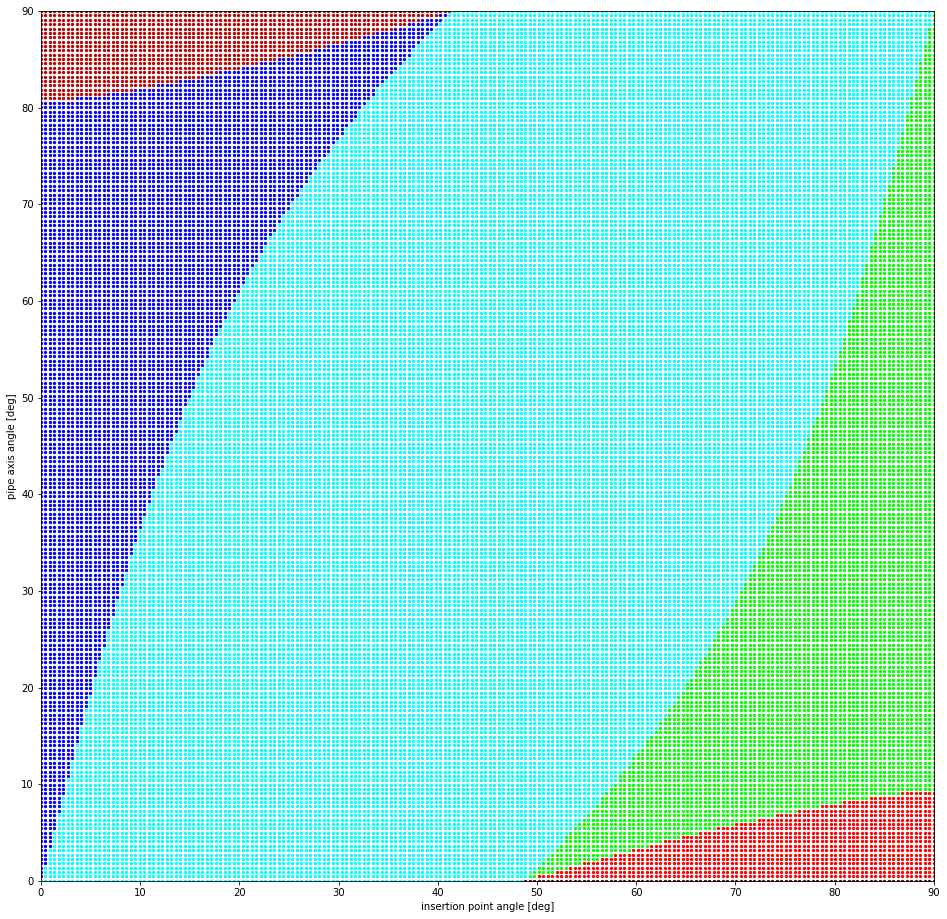

In [43]:
plt.figure(figsize=(16,16))
for ii, junction_angle in enumerate(junct_α):
    for jj, insert_angle in enumerate(insert_α):
        plt.plot(np.rad2deg(junction_angle),np.rad2deg(insert_angle),'.',ms=4.5,color=data_c[ii,jj,:])
plt.xlim([0,90])
plt.ylim([0,90])
plt.xlabel('insertion point angle [deg]')
plt.ylabel('pipe axis angle [deg]')
plt.savefig('feasible_region.png')